In [196]:
#Import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the stock dataset
stock_data = pd.read_csv("My Usage/MS Coursework/Sem2/Data Mining Techniques/Assignments/Group Project/all_stocks_5yr.csv")


In [197]:
#Printing the head
print("First few rows of the dataset:")
print(stock_data.head())

First few rows of the dataset:
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [198]:
#Pre-processing Data - Step 1
print("Count of null values:")
#Count of the null values
print(stock_data.isna().sum())

# Remove NA values
stock_data.dropna(inplace=True)

# Get the type of each variable (column) in the DataFrame
variable_types = stock_data.dtypes

# Print the type of each variable
print("The data type of each variable is as follows")
print(variable_types)
print(stock_data.head())

Count of null values:
date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64
The data type of each variable is as follows
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [199]:
# Identify total unique stocks in 'Name'
total_unique_stocks = stock_data['Name'].nunique()
print("Total unique stocks in the data are:")
print(total_unique_stocks)


Total unique stocks in the data are:
505


In [200]:
#Preprocessing-Step 2  : Convert the 'Date' column to datetime object
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Split the 'Date' column into 'Year', 'Month', and 'Day' columns
stock_data['Year'] = stock_data['date'].dt.year
stock_data['Month'] = stock_data['date'].dt.month
stock_data['Day'] = stock_data['date'].dt.day
print(stock_data.head())

        date   open   high    low  close    volume Name  Year  Month  Day
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL  2013      2    8
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL  2013      2   11
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL  2013      2   12
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL  2013      2   13
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL  2013      2   14


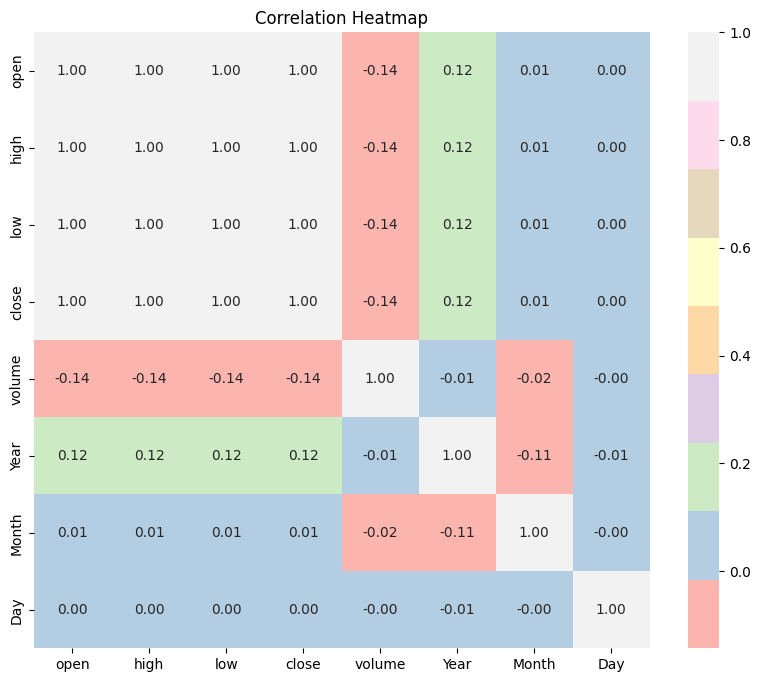

In [202]:
#Correlation heatmap


# EDA: Correlation Heatmap
correlation_matrix = stock_data.drop(columns=['date','Name']).corr()  # Exclude 'Date' column from correlation calculation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f", square=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.title('Correlation Heatmap')
plt.show()

#Values for cmap=Blues,RdBu,coolwarm, Pastel1, Set3, tab10

C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\1410395219.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stock_data['date'] = pd.to_datetime(selected_stock_data['date'])


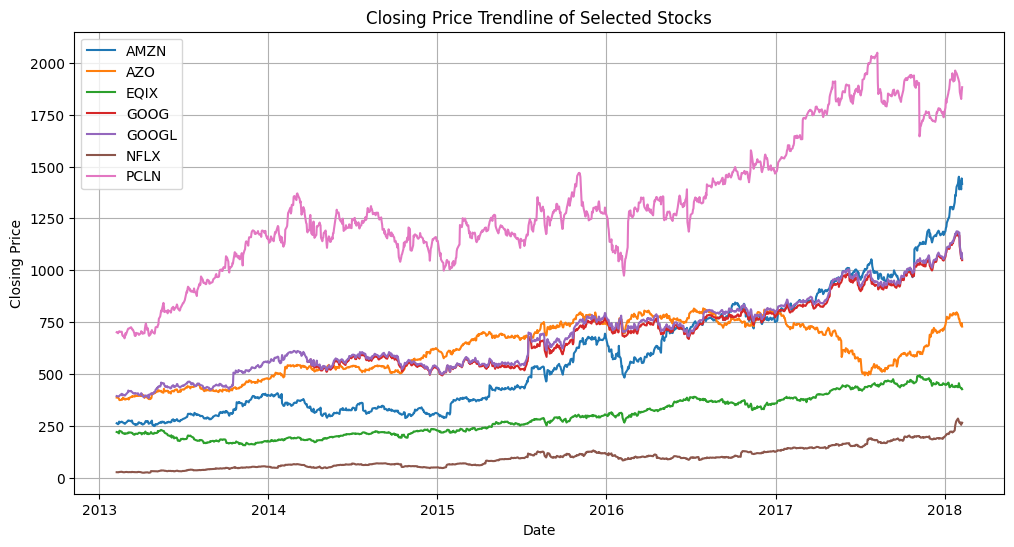

In [203]:
#Closing price trendline for 5 stocks
import pandas as pd
import matplotlib.pyplot as plt

# Select stocks for comparison
selected_stocks = ['AMZN', 'GOOGL', 'GOOG','PCLN', 'AZO', 'NFLX','EQIX']

# Filter data for selected stocks
selected_stock_data = stock_data[stock_data['Name'].isin(selected_stocks)]

# Convert 'Date' column to datetime
selected_stock_data['date'] = pd.to_datetime(selected_stock_data['date'])

# Set 'Date' as index
selected_stock_data.set_index('date', inplace=True)

# Plot line charts for selected stocks
plt.figure(figsize=(12, 6))
for stock_name, group in selected_stock_data.groupby('Name'):
    plt.plot(group.index, group['close'], label=stock_name)

plt.title('Closing Price Trendline of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [204]:
# Group data by stock names and find the maximum closing price for each stock
top_10_stocks = stock_data.groupby('Name')['close'].max().nlargest(10)

# Display the list of top 5 stocks with their closing prices
print("Top 10 stocks based on closing prices:")
print(top_10_stocks)


Top 10 stocks based on closing prices:
Name
PCLN     2049.00
AMZN     1450.89
GOOGL    1187.56
GOOG     1175.84
AZO       815.98
CMG       757.77
MTD       692.30
BLK       593.26
REGN      592.40
EQIX      492.98
Name: close, dtype: float64


C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\1509650900.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



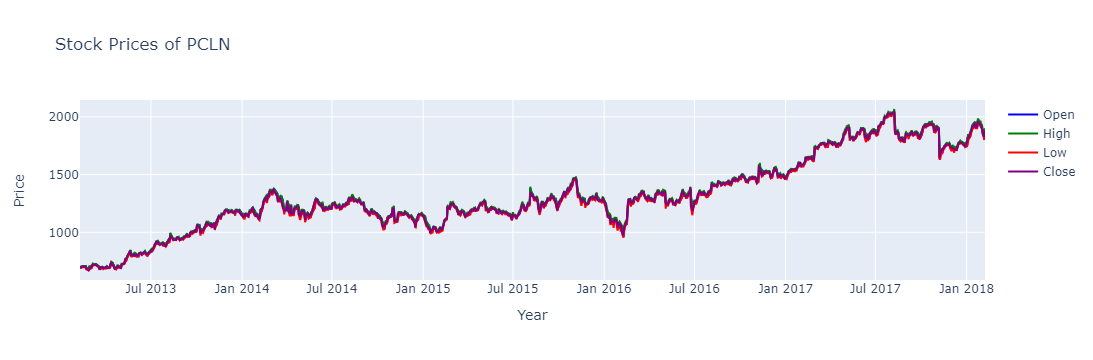

C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\1509650900.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



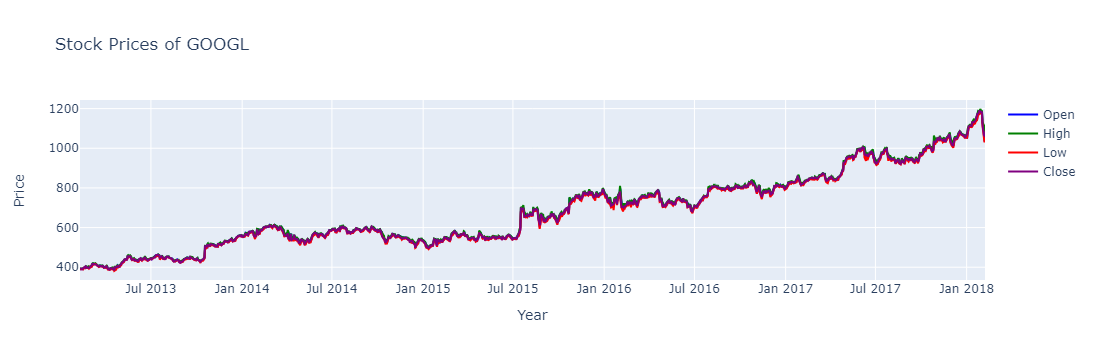

In [230]:
#Dynamic Interactive Graph for both PCLN and GOOGL -Open,Close, High and Low line graph
import plotly.graph_objs as go

def plot_stock_prices(stock_data, stock_name):
    # Filter data for the specified stock
    stock_data = stock_data[stock_data['Name'] == stock_name]
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    
    # Set 'date' as index
    stock_data.set_index('date', inplace=True)
    
    # Create traces for each stock price component
    trace_open = go.Scatter(x=stock_data.index, y=stock_data['open'], mode='lines', name='Open', line=dict(color='blue'))
    trace_high = go.Scatter(x=stock_data.index, y=stock_data['high'], mode='lines', name='High', line=dict(color='green'))
    trace_low = go.Scatter(x=stock_data.index, y=stock_data['low'], mode='lines', name='Low', line=dict(color='red'))
    trace_close = go.Scatter(x=stock_data.index, y=stock_data['close'], mode='lines', name='Close', line=dict(color='purple'))

    # Create layout
    layout = go.Layout(
        title=f'Stock Prices of {stock_name}',
        xaxis=dict(title='Year'),
        yaxis=dict(title='Price'),
        hovermode='closest'
    )

    # Plot the time series of stock prices using Plotly
    fig = go.Figure(data=[trace_open, trace_high, trace_low, trace_close], layout=layout)
    fig.show()
    # Format x-axis dates
    axes[row, col].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

# Call the function with the stock data and the desired stock names
plot_stock_prices(stock_data, 'PCLN')
plot_stock_prices(stock_data, 'GOOGL')


C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\3784845163.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



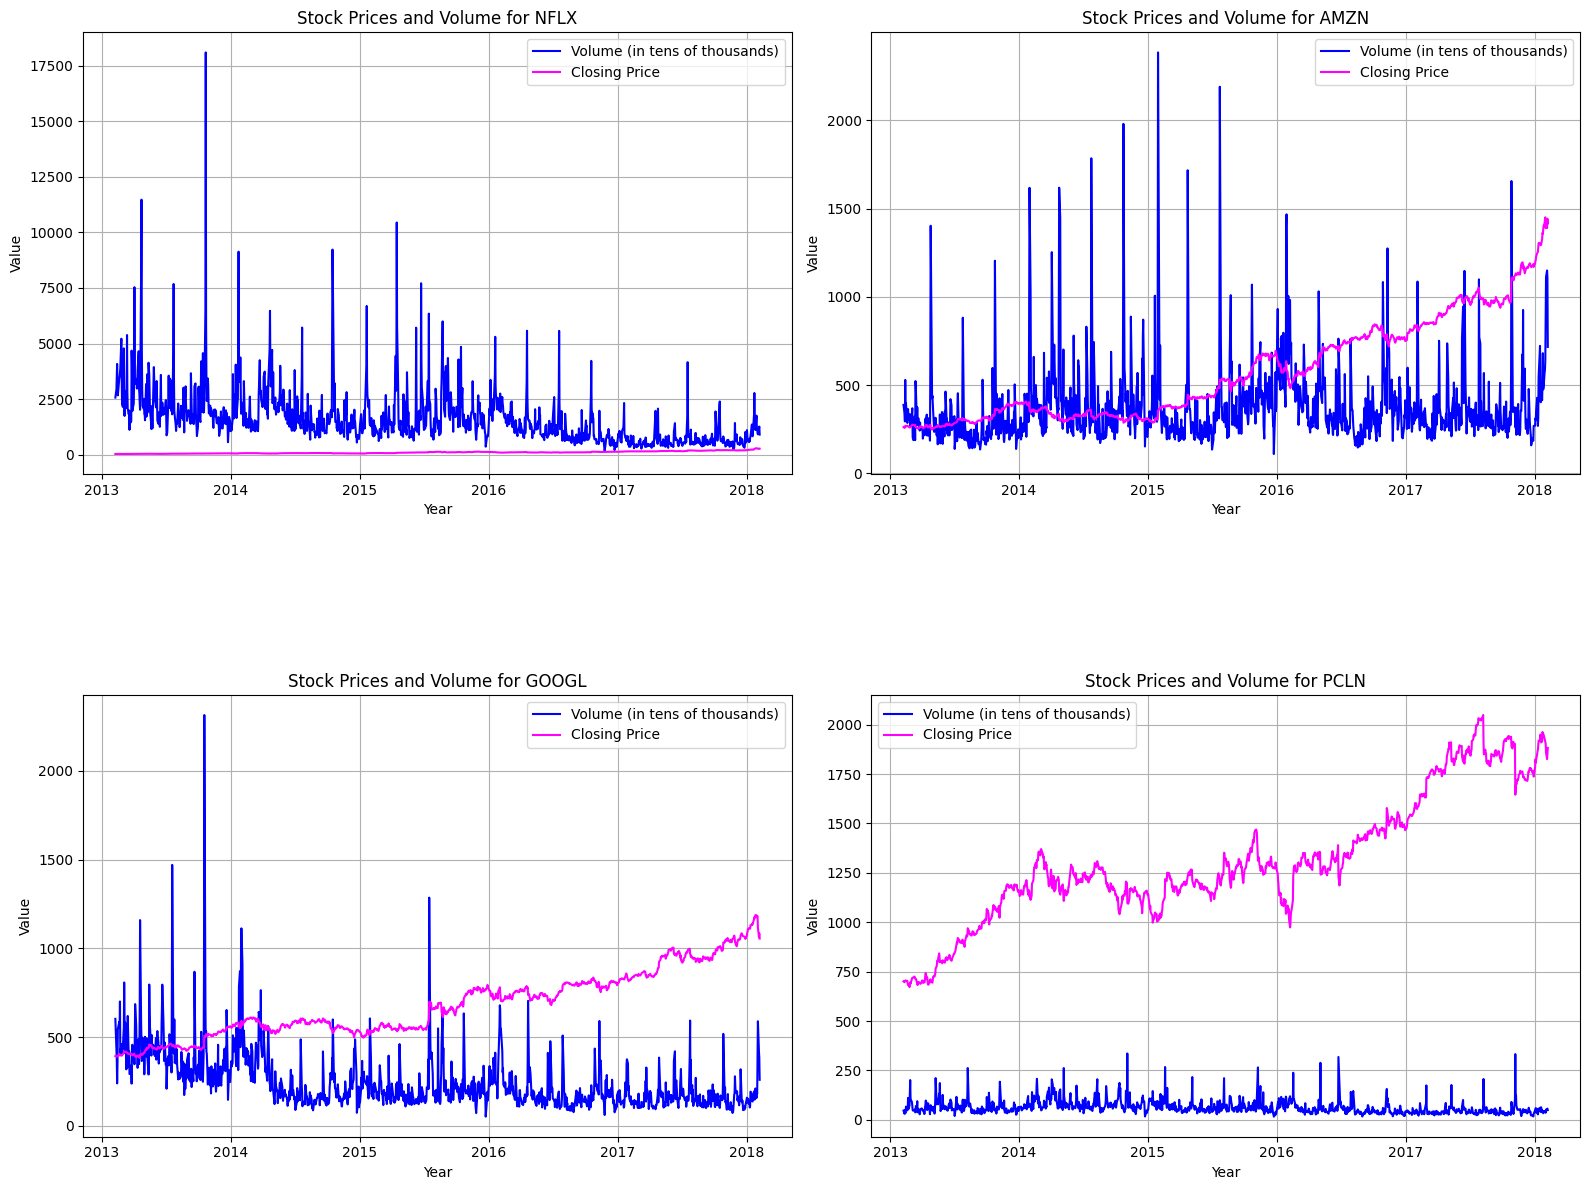

In [219]:
#Stock closing price fluctuations against Volume(in tens of thousands)
# Create subplots for each stock as a 2x2 matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Filter data for the selected stocks
selected_stocks_data = stock_data[stock_data['Name'].isin(['NFLX', 'AMZN', 'GOOGL', 'PCLN'])]

# Convert 'date' column to datetime
selected_stocks_data['date'] = pd.to_datetime(selected_stocks_data['date'])

# Set 'date' as index
selected_stocks_data.set_index('date', inplace=True)

# Plot volume and closing values for each stock
for i, stock_name in enumerate(['NFLX', 'AMZN', 'GOOGL', 'PCLN']):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    
    stock_data_subset = selected_stocks_data[selected_stocks_data['Name'] == stock_name]
    axes[row, col].plot(stock_data_subset.index, stock_data_subset['volume'] / 1e4, color='blue', label='Volume (in tens of thousands)')
    axes[row, col].plot(stock_data_subset.index, stock_data_subset['close'], color='magenta', label='Closing Price')
    axes[row, col].set_title(f'Stock Prices and Volume for {stock_name}')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Value')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Adjust layout and scale
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.show()


C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\1501092866.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\1501092866.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\1501092866.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

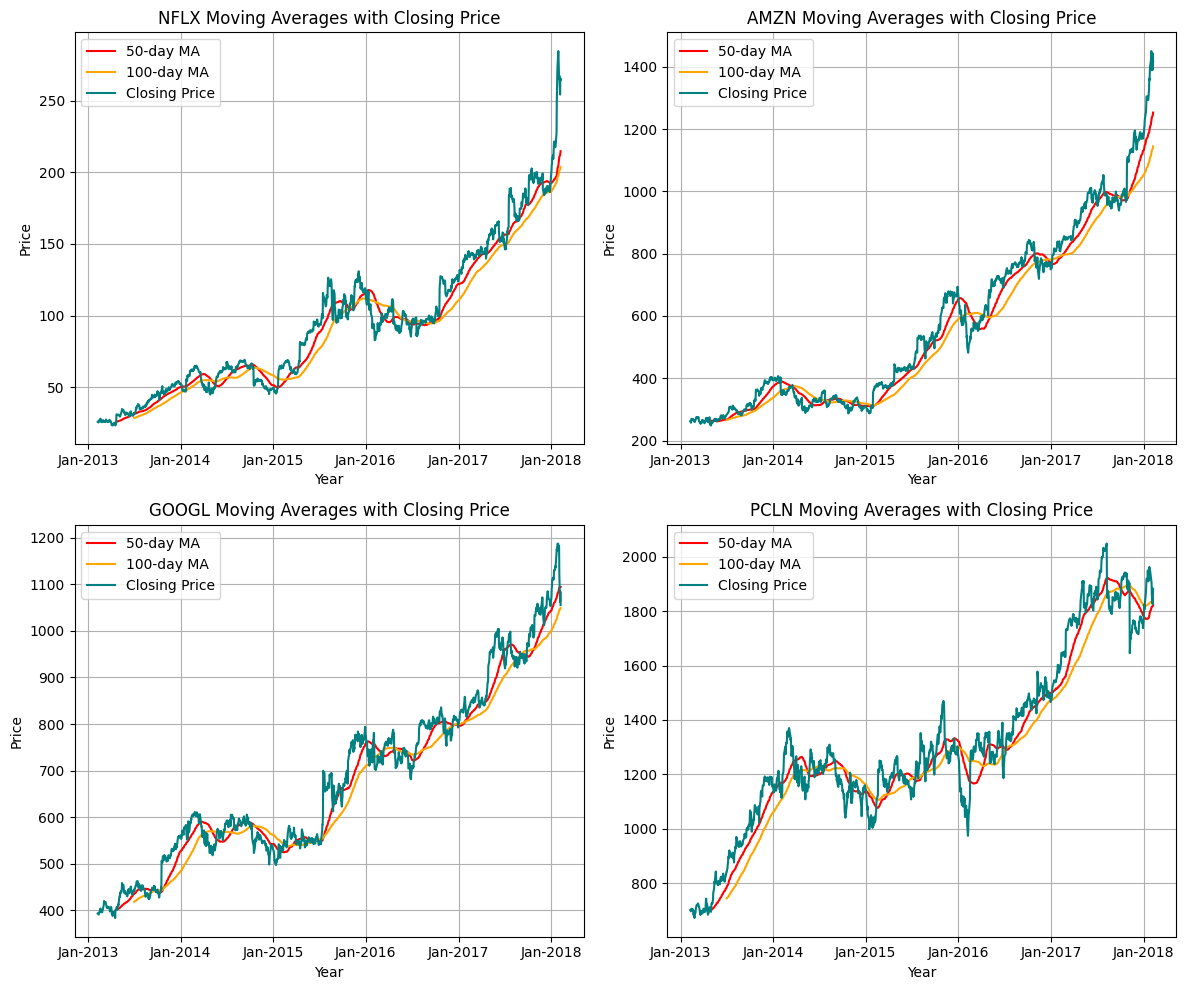

In [224]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import for date formatting


def plot_multi_stock_moving_averages_with_close_custom_colors(stock_data, stock_names, window_sizes):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Define colors for the moving averages
    ma_colors = ['red', 'orange']  # Custom colors for 50-day and 200-day moving averages

    for i, stock_name in enumerate(stock_names):
        row = i // 2  # Calculate row index
        col = i % 2   # Calculate column index

        # Filter data for the specified stock
        stock_data_subset = stock_data[stock_data['Name'] == stock_name]
        stock_data_subset['date'] = pd.to_datetime(stock_data_subset['date'])

        # Set 'date' as index
        stock_data_subset.set_index('date', inplace=True)
        
        for j, window_size in enumerate(window_sizes):
            # Calculate moving average
            moving_average = stock_data_subset['close'].rolling(window=window_size).mean()

            # Plot moving average with custom color
            axes[row, col].plot(stock_data_subset.index, moving_average, label=f'{window_size}-day MA', color=ma_colors[j])

        # Plot individual stock closing pattern
        axes[row, col].plot(stock_data_subset.index, stock_data_subset['close'], label='Closing Price', color='teal')

        # Add labels and legend
        axes[row, col].set_title(f'{stock_name} Moving Averages with Closing Price')
        axes[row, col].set_xlabel('Year')
        axes[row, col].set_ylabel('Price')
        axes[row, col].legend()
        axes[row, col].grid(True)

        # Format x-axis dates
        axes[row, col].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Call the function with the stock data, stock names, and window sizes
plot_multi_stock_moving_averages_with_close_custom_colors(stock_data, ['NFLX', 'AMZN', 'GOOGL', 'PCLN'], [50, 100])


In [209]:
#Unique Stocks having highest CLosing Price correlation
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named 'stock_data'

# Filter the DataFrame to include only the closing prices of the stocks
closing_prices = stock_data.pivot(index='date', columns='Name', values='close')

# Calculate the correlation matrix
correlation_matrix = closing_prices.corr()

# Exclude self-correlations (correlation of a stock with itself)
correlation_matrix_filtered = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape, dtype=bool)))

# Find the top 10 highest correlations
top_10_correlations = correlation_matrix_filtered.unstack().sort_values(ascending=False).head(10)

# Display the top 10 highest correlations
print("Top 10 Highest Unique Correlations (excluding self-correlations and duplicates):")
print(top_10_correlations)


Top 10 Highest Unique Correlations (excluding self-correlations and duplicates):
Name   Name 
GOOGL  GOOG     0.999085
DISCK  DISCA    0.998131
XEL    CMS      0.993641
UAA    UA       0.992877
FOXA   FOX      0.992754
NOC    LMT      0.991380
UNH    CTAS     0.989285
TXN    ITW      0.989052
MMC    AON      0.989003
WEC    CMS      0.988950
dtype: float64


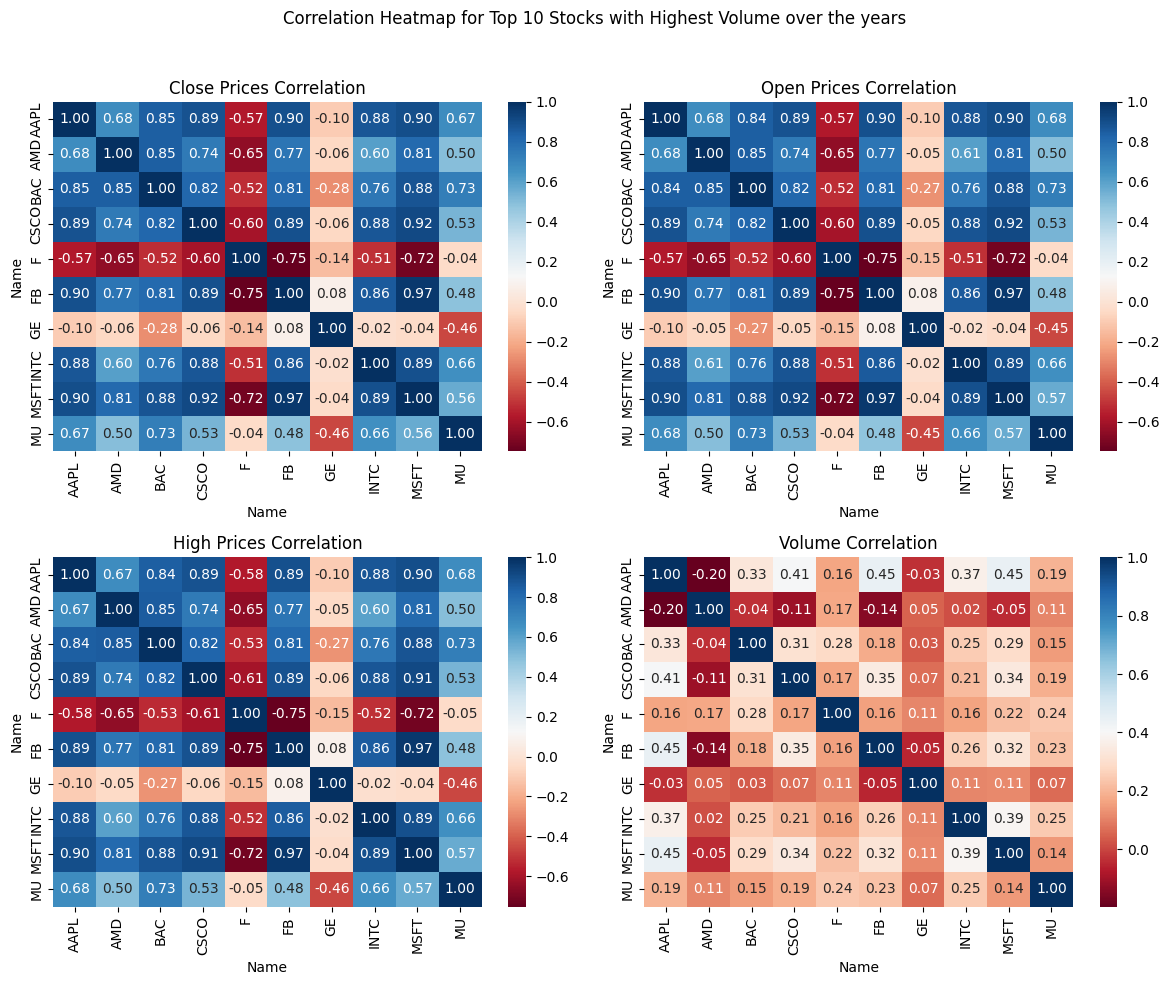

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame named 'stock_data'

# Group the data by stock name and calculate the total volume
stock_volume = stock_data.groupby('Name')['volume'].sum()

# Select the top 20 stocks with the highest volume
top_10_stocks = stock_volume.nlargest(10).index

# Filter the DataFrame to include only the data of the top 20 stocks
top_10_stock_data = stock_data[stock_data['Name'].isin(top_10_stocks)]

# Create subplots for close, open, high, and volume
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot close prices
sns.heatmap(top_10_stock_data.pivot(index='date', columns='Name', values='close').corr(), ax=axes[0, 0], cmap='RdBu', annot=True, fmt=".2f")
axes[0, 0].set_title("Close Prices Correlation")

# Plot open prices
sns.heatmap(top_10_stock_data.pivot(index='date', columns='Name', values='open').corr(), ax=axes[0, 1], cmap='RdBu', annot=True, fmt=".2f")
axes[0, 1].set_title("Open Prices Correlation")

# Plot high prices
sns.heatmap(top_10_stock_data.pivot(index='date', columns='Name', values='high').corr(), ax=axes[1, 0], cmap='RdBu', annot=True, fmt=".2f")
axes[1, 0].set_title("High Prices Correlation")

# Plot volume
sns.heatmap(top_10_stock_data.pivot(index='date', columns='Name', values='volume').corr(), ax=axes[1, 1], cmap='RdBu', annot=True, fmt=".2f")
axes[1, 1].set_title("Volume Correlation")

# Set the title of the entire figure
fig.suptitle("Correlation Heatmap for Top 10 Stocks with Highest Volume over the years\n\n")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [211]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Subset the Dataset
subset_data = stock_data[['Name', 'open', 'close']]

# 2. Handle Missing Values (if any)
subset_data.dropna(inplace=True)

# 3. Split the Data
X = subset_data[['Name', 'open']]
y = subset_data['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Encode Categorical Variables (if necessary)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# 5. Train the Model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# 6. Make Predictions
y_pred = model.predict(X_test_encoded)

# 7. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


C:\Users\shiva\AppData\Local\Temp\ipykernel_17940\3916556847.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Mean Squared Error: 2.3472488909029274


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 1.5320733960561184
MAE: 0.7357614864701028


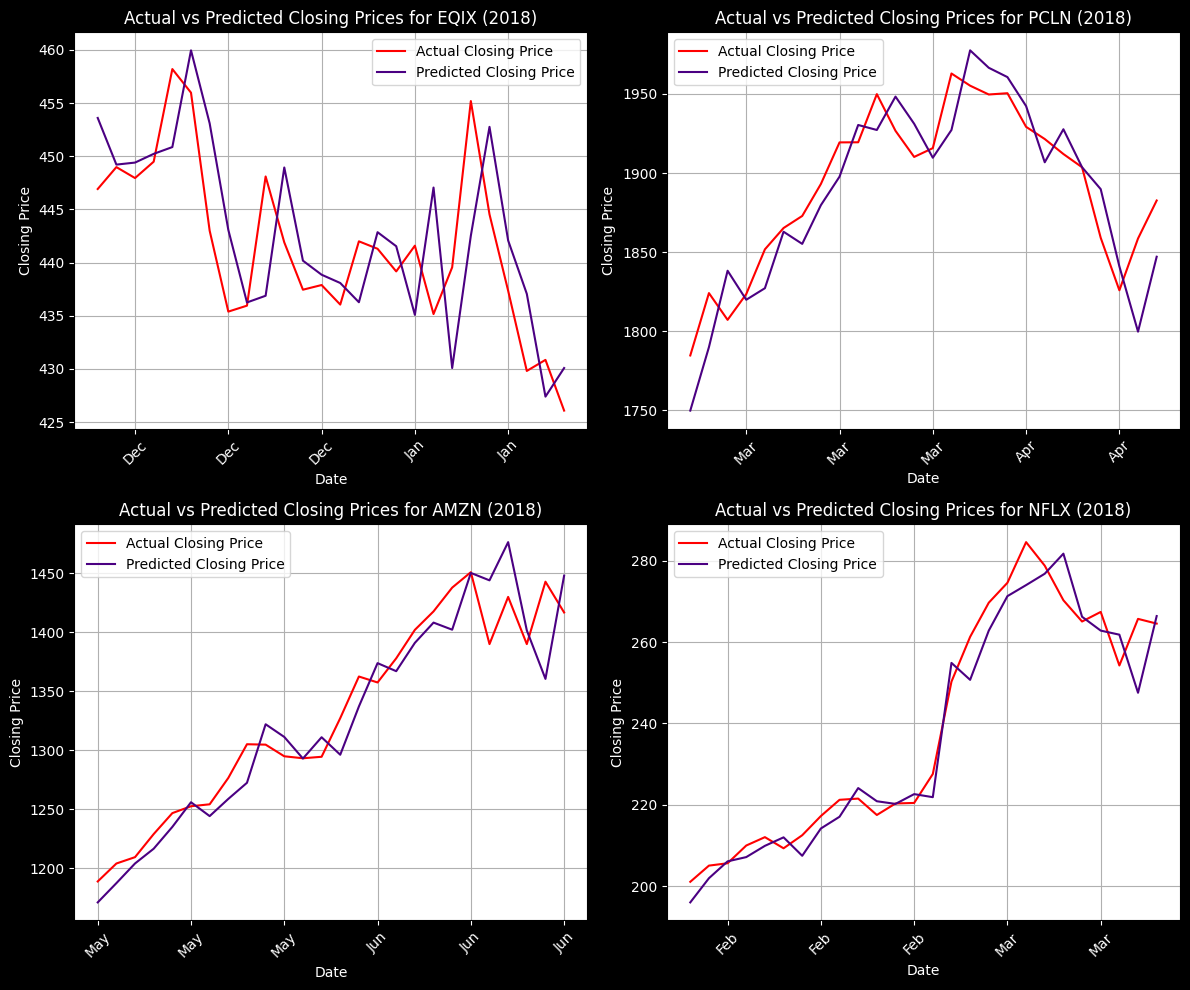

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.dates as mdates

# Assuming you have loaded your data into a DataFrame named 'stock_data'

# Filter data for the training period (2013-2017)
train_data = stock_data[stock_data['date'].dt.year <= 2017]

# Create a list of stock symbols
stocks = ['EQIX', 'PCLN', 'AMZN', 'NFLX']

# Create subplots for each stock
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), facecolor='black')

# Initialize lists to store evaluation metrics
test_mse_list = []
test_mae_list = []
test_rmse_list = []

# Iterate over each stock symbol
for i, stock in enumerate(stocks):
    # Filter test data for the current stock symbol
    test_data = stock_data[(stock_data['date'].dt.year == 2018) & (stock_data['Name'] == stock)]
    
    # Extract features (X: open price) and target (Y: close price)
    X_train = train_data[train_data['Name'] == stock][['open']]
    y_train = train_data[train_data['Name'] == stock]['close']
    X_test = test_data[['open']]
    y_test = test_data['close']
    
    # Train linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    # Predict closing prices
    y_pred = regression_model.predict(X_test)
    
    # Calculate evaluation metrics
    test_mse = mean_squared_error(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    
    # Append evaluation metrics to lists
    test_mse_list.append(test_mse)
    test_mae_list.append(test_mae)
    test_rmse_list.append(test_rmse)
    
    # Plot actual vs predicted closing prices
    row = i // 2
    col = i % 2
    axs[row, col].plot(test_data.index, y_test, label='Actual Closing Price', color='Red')
    axs[row, col].plot(test_data.index, y_pred, label='Predicted Closing Price', color='Indigo')
    axs[row, col].set_title(f'Actual vs Predicted Closing Prices for {stock} (2018)', color='white')
    axs[row, col].set_xlabel('Date', color='white')
    axs[row, col].set_ylabel('Closing Price', color='white')
    axs[row, col].legend()
    axs[row, col].grid(True)
    axs[row, col].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format x-axis dates
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].tick_params(colors='white')
    
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [178]:
# Calculate the average volume for the entire dataset
average_volume = stock_data['volume'].mean()
print("Average Volume for the Entire Dataset:", average_volume)


Average Volume for the Entire Dataset: 4321891.930248825


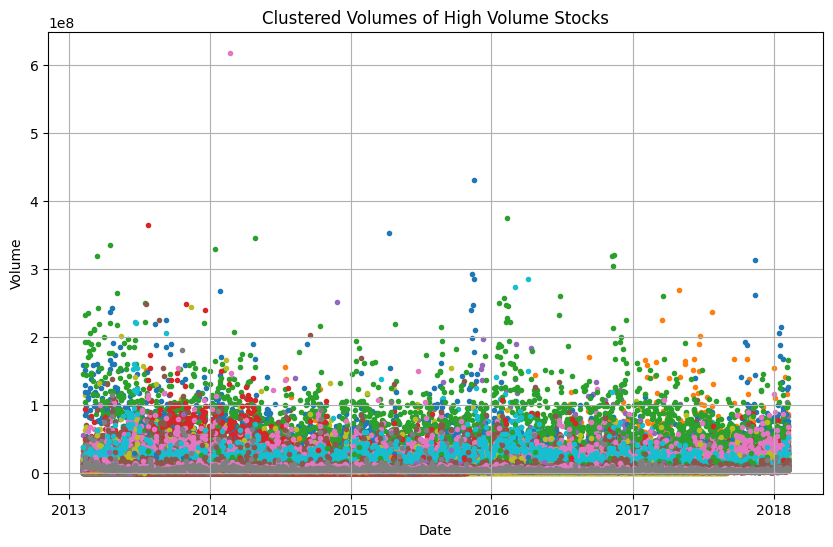

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Group the data by stock name and calculate average volume
avg_volume_per_stock = stock_data.groupby('Name')['volume'].mean().reset_index()
avg_volume_per_stock.columns = ['Name', 'avg_volume']

# Filter stocks with average volume greater than the threshold
threshold = 4321891.93024882
high_volume_stocks = avg_volume_per_stock[avg_volume_per_stock['avg_volume'] > threshold]

# Extract volume data for high volume stocks
high_volume_stock_data = stock_data[stock_data['Name'].isin(high_volume_stocks['Name'])]

# Pivot the data to have stocks as columns and dates as rows
volume_pivot = high_volume_stock_data.pivot(index='date', columns='Name', values='volume')

# Fill missing values with 0
volume_pivot.fillna(0, inplace=True)

# Normalize the volume data
scaler = StandardScaler()
scaled_volume = scaler.fit_transform(volume_pivot)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_volume.T)  # Transpose to match dimensions

# Plot the clustered volumes as dots
plt.figure(figsize=(10, 6))
for i in range(5):
    cluster_stocks = volume_pivot.columns[cluster_labels == i]
    for stock in cluster_stocks:
        plt.scatter(volume_pivot.index, volume_pivot[stock], label=f'Cluster {i}' if i == 0 else None, marker='.')


plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Clustered Volumes of High Volume Stocks')
plt.grid(True)
plt.show()


In [168]:
# Initialize dictionary to store stocks in each cluster
cluster_stocks_dict = {i: [] for i in range(5)}

# Iterate over clusters and stocks
for i in range(5):
    cluster_stocks = volume_pivot.columns[cluster_labels == i]
    # Limit to first 5 stocks in each cluster
    cluster_stocks = cluster_stocks[:5]
    cluster_stocks_dict[i] = cluster_stocks

# Print stocks in each cluster
for cluster, stocks in cluster_stocks_dict.items():
    print(f"Cluster {cluster}: {', '.join(stocks)}")


Cluster 0: GGP
Cluster 1: ABBV, CBS, CRM, CTSH, HD
Cluster 2: AMD, APC, CFG, CHK, CTL
Cluster 3: AAL, ABT, AES, AMAT, ARNC
Cluster 4: AAPL, AIG, BAC, BBY, BMY


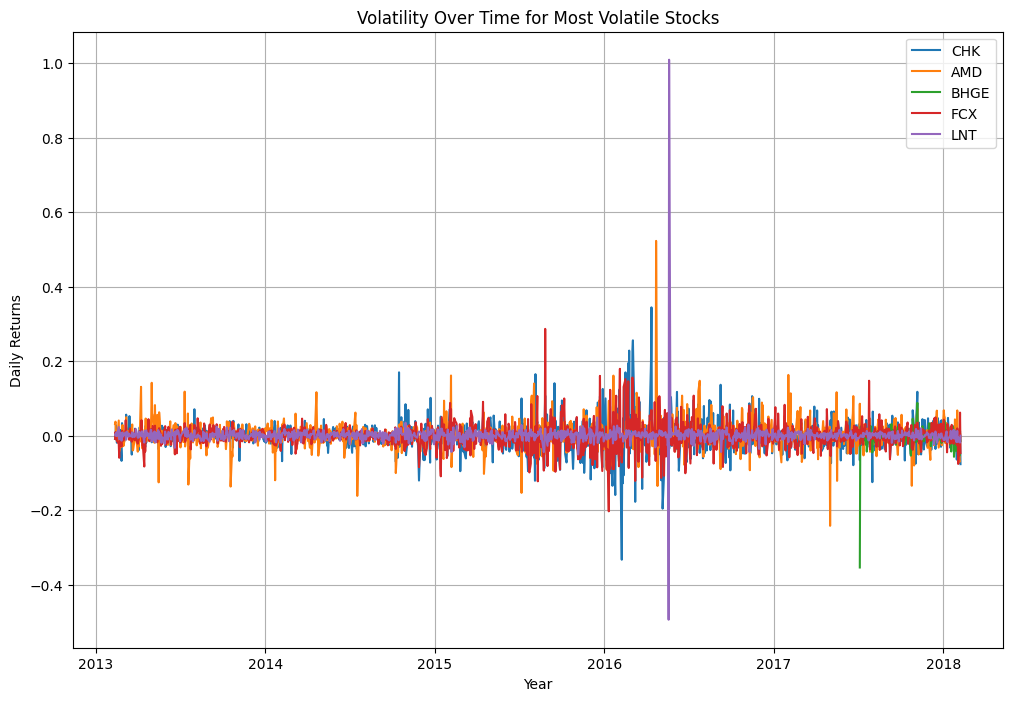

In [195]:
#VOLATILITY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your stock data into a DataFrame named 'stock_data'
# Make sure the DataFrame has columns 'Date' and 'Close' for the date and closing price, respectively

# Calculate daily returns for each stock
stock_data['Daily_Return'] = stock_data.groupby('Name')['close'].pct_change()

# Compute standard deviation of daily returns for each stock
volatility = stock_data.groupby('Name')['Daily_Return'].std()

# Find the top 5 most volatile stocks
most_volatile_stocks = volatility.nlargest(5)

# Extract data for the most volatile stocks
volatile_stock_data = stock_data[stock_data['Name'].isin(most_volatile_stocks.index)]

# Plot volatility over time for the most volatile stocks
plt.figure(figsize=(12, 8))
for stock in most_volatile_stocks.index:
    stock_data_filtered = volatile_stock_data[volatile_stock_data['Name'] == stock]
    plt.plot(stock_data_filtered['date'], stock_data_filtered['Daily_Return'], label=stock)

plt.title('Volatility Over Time for Most Volatile Stocks')
plt.xlabel('Year')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()
